###### Autor: Johnny Rubio Pecasso
###### Fecha: 06/sep/2024
###### Introduccion a la ciencia de datos
###### Notebook Practica 1

# Analisis de Resultados de las Olimpiadas Paris 2024.

En esta primera parte de la practica se muestran algunas visualizaciones de los datasets; 
en este trabajo se estara analizando una base con datos recolectados en la ultima edicion 
de los juegos olimpicos que se llevo a cabo en Paris 2024.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Estilo de graficos
sns.set(style="whitegrid")

# dataset medallistas
df_medalist = pd.read_csv('medallists.csv')
df_medalist.head()


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [2]:
# dataset medallas
df_medals = pd.read_csv('medals_total.csv')
df_medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [3]:
# dataset equipos
df_teams = pd.read_csv('teams.csv')
df_teams.head()

,code,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN
2,ARCMTEAM3---FRA01,France,M,FRA,France,France,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN
3,ARCMTEAM3---GBR01,Great Britain,M,GBR,Great Britain,Great Britain,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN
4,ARCMTEAM3---IND01,India,M,IND,India,India,Archery,ARC,Men's Team,"['BOMMADEVARA Dhiraj', 'JADHAV Pravin Ramesh',...",NaN,"['1546108', '1546112', '1546110']",3.0,NaN,NaN


## Datasets Analizados: 
Se estaran analizando tres datasets el primero lo llamammos df_medallists contiene los medallistas y sus 
disiplinas de manera individual, el segundo analizado es df_medals, donde se tiene el conteo de todos lo premios en el
evento y por ultimo df_teams donde se analizan los participantes por sus naciones.

In [9]:
# Informacion general del dataset
# Contamos los tipos de datos de cada columna
data_types = df_medalist.dtypes.value_counts()

# Visualizamos el resumen estadistico y los tipos de datos 
print("Resumen estadistico de las variables numericas:")
display(df_medalist.describe())

print("\nDistribucion de tipos de datos:")
display(data_types)

# Análisis de valores nulos
missing_values = df_medalist.isnull().sum()
missing_percentage = (missing_values / len(df_medals)) * 100

# Mostramos el conteo de valores nulos y su porcentaje
missing_data = pd.DataFrame({'Total valores nulos': missing_values, 
                             'Porcentaje (%)': missing_percentage})

# Filtramos solo las columnas que tienen valores nulos
missing_data = missing_data[missing_data['Total valores nulos'] > 0]
missing_data.sort_values(by='Total valores nulos', ascending=False, inplace=True)

# Mostrar la tabla de valores nulos y porcentajes
print("Valores nulos en el dataset:")
display(missing_data)


Resumen estadístico de las variables numéricas:


,medal_code,code_athlete
count,2314.000000,2.315000e+03
mean,2.023336,1.893321e+06
std,0.820390,2.628276e+05
min,1.000000,1.532872e+06
25%,1.000000,1.896552e+06
50%,2.000000,1.924464e+06
75%,3.000000,1.950498e+06
max,3.000000,4.980004e+06



Distribución de tipos de datos:


object     16
float64     1
int64       1
Name: count, dtype: int64

Valores nulos en el dataset:


,Total valores nulos,Porcentaje (%)
team,760,826.086957
team_gender,760,826.086957
code_team,760,826.086957
url_event,21,22.826087
nationality,5,5.434783
name,3,3.260870
gender,3,3.260870
country_code,3,3.260870
country,3,3.260870
country_long,3,3.260870


In [8]:
# Informacion general del dataset
# Contamos los tipos de datos de cada columna
data_types = df_medals.dtypes.value_counts()

# Visualizamos el resumen estadistico y los tipos de datos
print("Resumen estadistico de las variables numericas:")
display(df_medals.describe())

print("\nDistribucion de tipos de datos:")
display(data_types)

# Análisis de valores nulos
missing_values = df_medals.isnull().sum()
missing_percentage = (missing_values / len(df_medals)) * 100

# Mostramos el conteo de valores nulos y su porcentaje
missing_data = pd.DataFrame({'Total valores nulos': missing_values, 
                             'Porcentaje (%)': missing_percentage})

# Filtramos solo las columnas que tienen valores nulos
missing_data = missing_data[missing_data['Total valores nulos'] > 0]
missing_data.sort_values(by='Total valores nulos', ascending=False, inplace=True)

# Mostrar la tabla de valores nulos y porcentajes
print("Valores nulos en el dataset:")
display(missing_data)


Resumen estadístico de las variables numéricas:


,Gold Medal,Silver Medal,Bronze Medal,Total
count,92.000000,92.000000,92.000000,92.000000
mean,3.576087,3.586957,4.173913,11.336957
std,6.957064,6.733796,6.537481,19.610648
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,5.000000
75%,3.000000,3.000000,5.000000,9.000000
max,40.000000,44.000000,42.000000,126.000000



Distribución de tipos de datos:


int64     4
object    3
Name: count, dtype: int64

Valores nulos en el dataset:


,Total valores nulos,Porcentaje (%)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              1698 non-null   object 
 1   team              1698 non-null   object 
 2   team_gender       1698 non-null   object 
 3   country_code      1698 non-null   object 
 4   country           1698 non-null   object 
 5   country_long      1698 non-null   object 
 6   discipline        1698 non-null   object 
 7   disciplines_code  1698 non-null   object 
 8   events            1377 non-null   object 
 9   athletes          1695 non-null   object 
 10  coaches           246 non-null    object 
 11  athletes_codes    1695 non-null   object 
 12  num_athletes      1695 non-null   float64
 13  coaches_codes     246 non-null    object 
 14  num_coaches       246 non-null    float64
dtypes: float64(2), object(13)
memory usage: 199.1+ KB


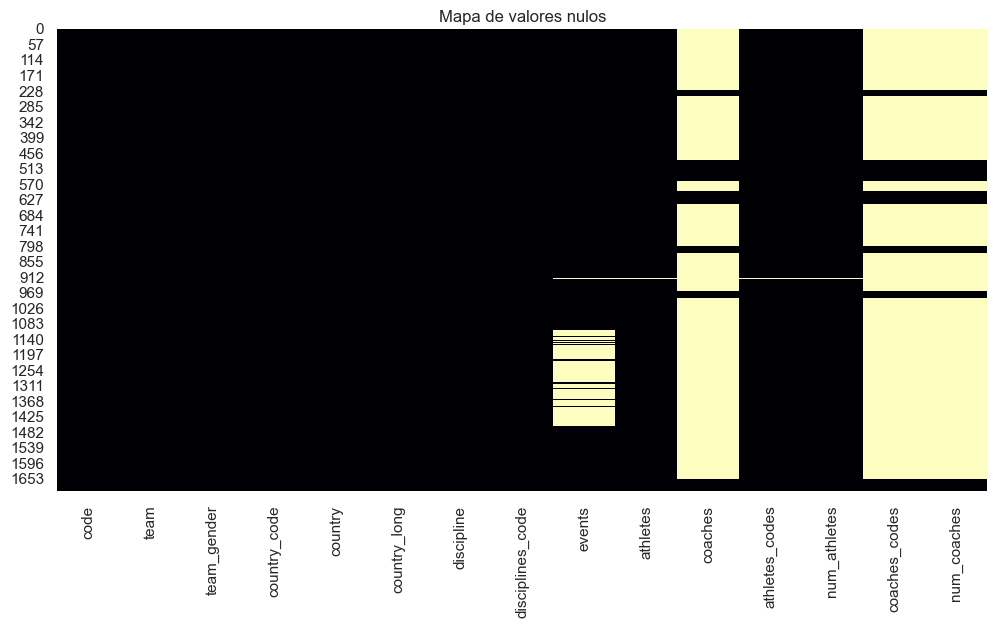

In [6]:
# Informacion general sobre el dataset
df_teams.info()

# Resumen estadistico de las variables 
df_teams.describe()

# Identificar valores nulos
df_teams.isnull().sum()

# Visualizamos los valores nulos en un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(df_teams.isnull(), cbar=False, cmap="magma")
plt.title('Mapa de valores nulos')
plt.show()

## Frecuencia de medallistas
En este analisis se puede observar la frecuencia con la cual se repartieron las medallas en las olimpiadas.

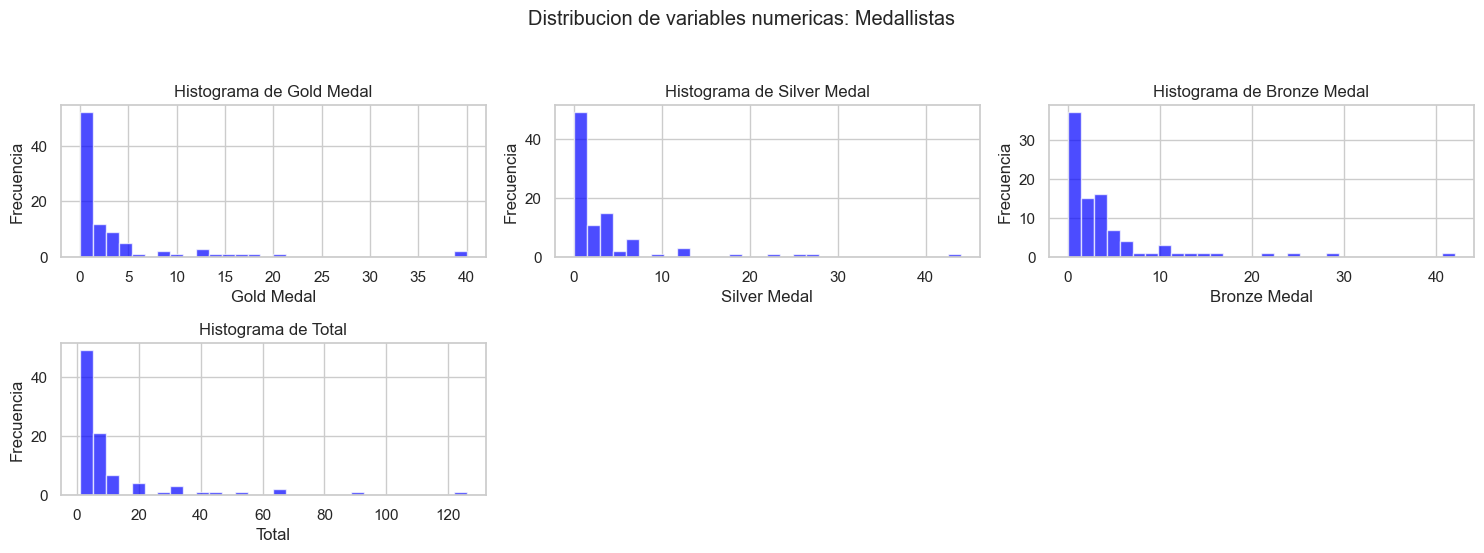

In [49]:
# Configuracion del tamaño del grafico y estilo
plt.figure(figsize=(15, 10))
plt.suptitle('Distribucion de variables numericas: Medallistas')

# Iteramos sobre todas las columnas numericas y creamos un histograma para cada una
for i, column in enumerate(df_medals.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)  
    df_medals[column].hist(bins=30, color='blue', alpha=0.7)
    
    # Agregamos etiquetas de título, eje x e y
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# Ajustamos el espacio entre los graficos
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


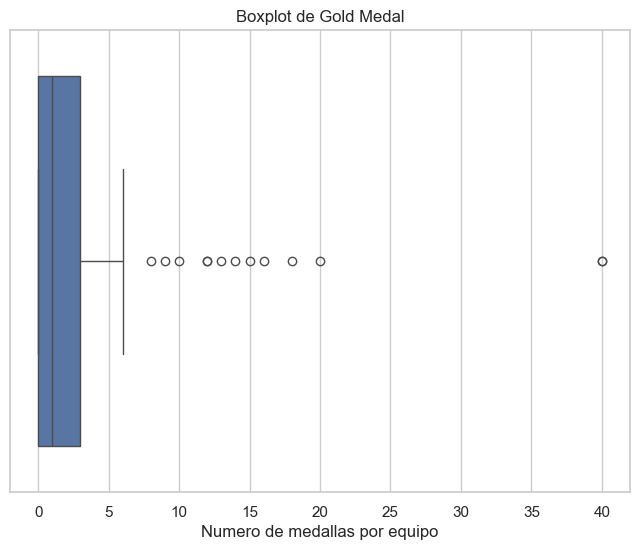

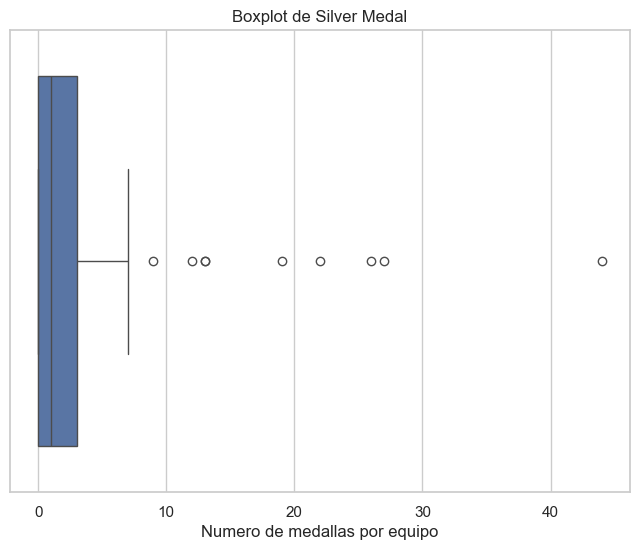

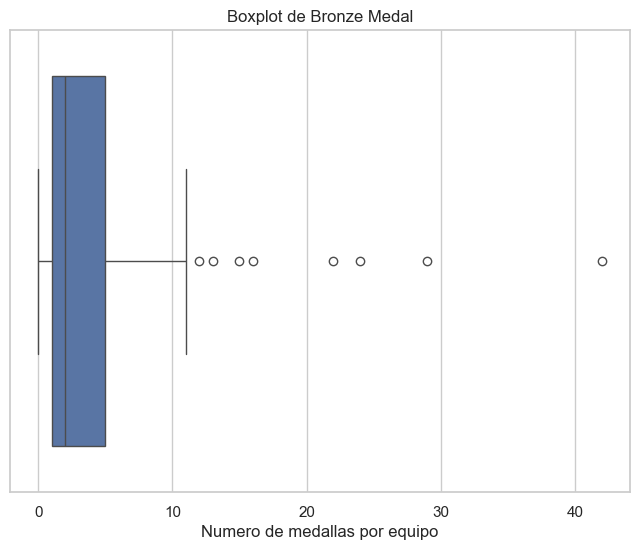

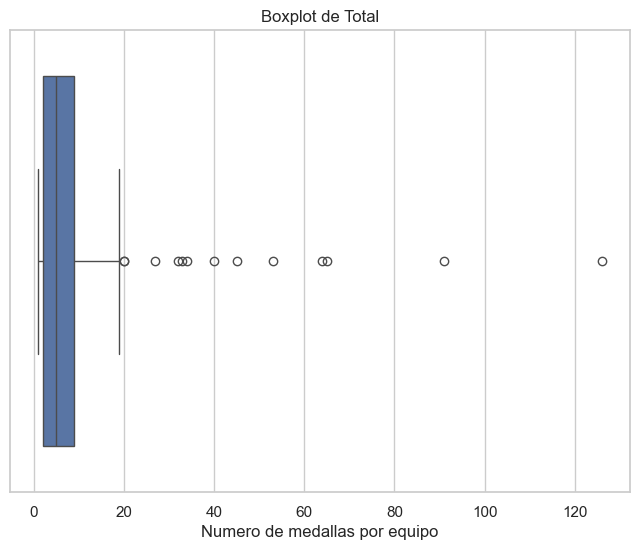

In [29]:
# Boxplots para identificar outliers
for col in df_medals.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_medals[col])
    
    plt.title(f'Boxplot de {col}')
    plt.xlabel('Numero de medallas por equipo')
    plt.show()

## Observacion:
En este analisis se utiliza las graficas de cajas para analizar los outliers por medallas
en este caso se puede observar que en general cada equipo almenos obtuvo un par de medallas.

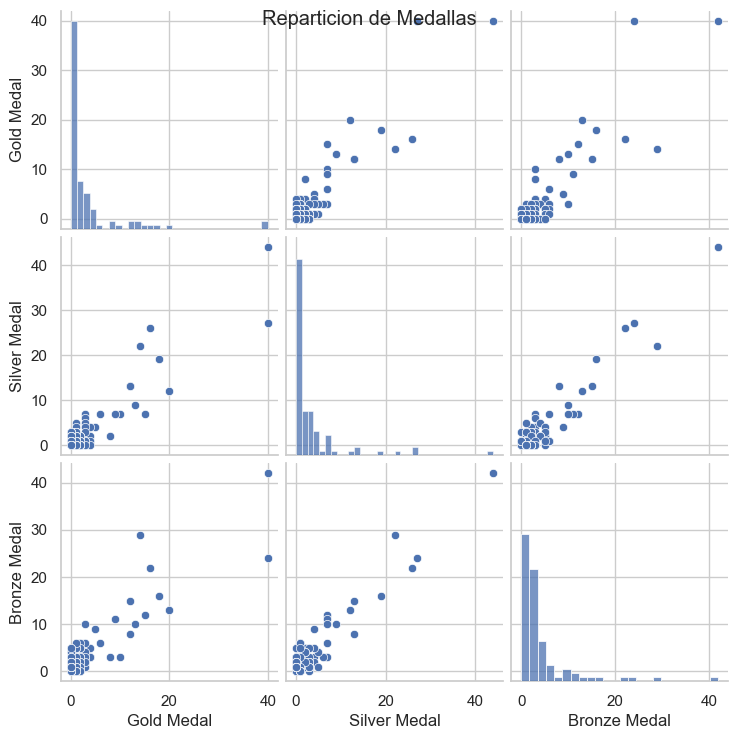

In [35]:
sns.pairplot(df_medals[['Gold Medal', 'Silver Medal', 'Bronze Medal']])
plt.suptitle('Reparticion de Medallas')
plt.show()


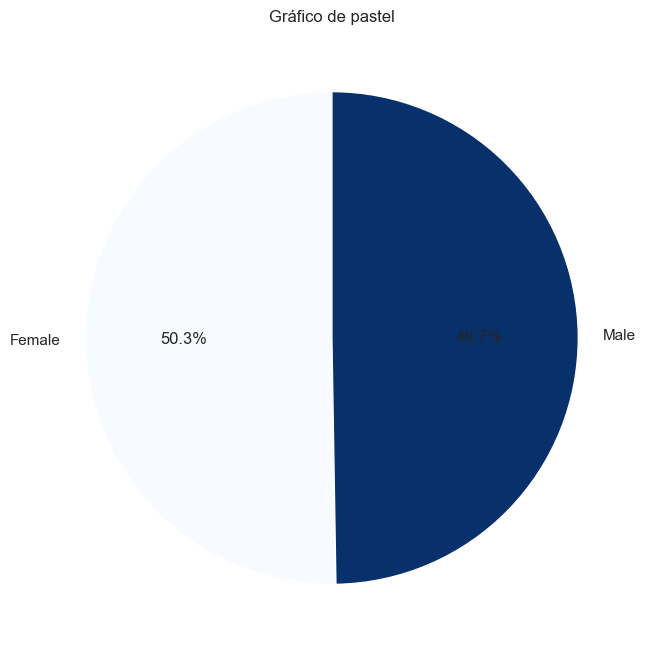

In [34]:
# Gráfico de pastel 
df_medalist['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), cmap='Blues')
plt.title('Participantes por genero')
plt.ylabel('')
plt.show()

## Distribucion por genero
En este ultimo grafico de pastel, se puede ver el balance entre genero de los juegos olimpicos, demostrando que 
las competencias actuales muestran la misma cantidad de atletas entre los dos generos.

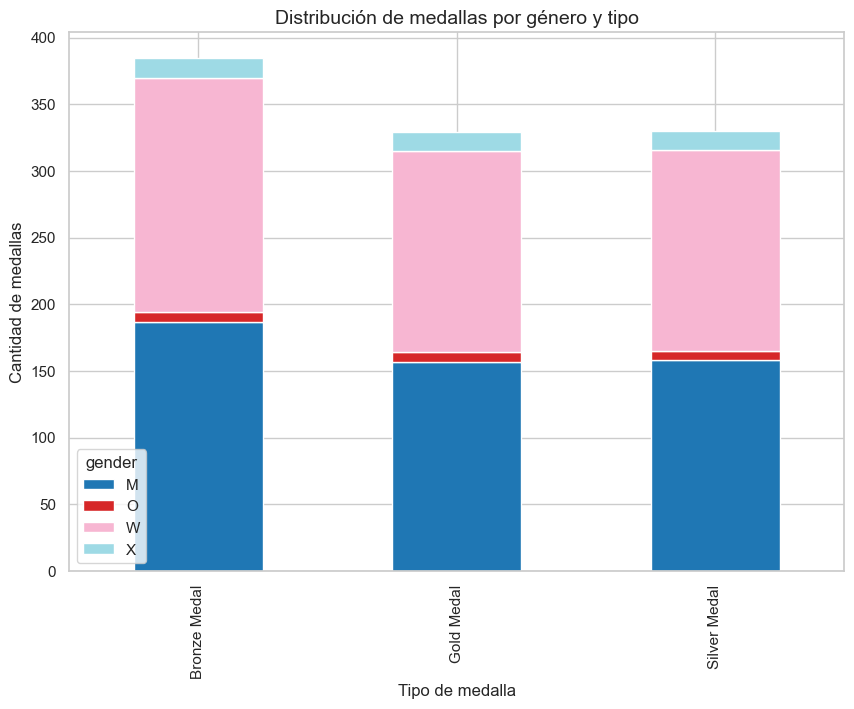

In [43]:
# dataset medallas
df_medals2 = pd.read_csv('medals.csv')

# Asegúrate de usar los nombres correctos de las columnas
df_grouped = df_medals2.groupby(['medal_type', 'gender']).size().unstack()

# Crear gráfico de barras apiladas
df_grouped.plot(kind='bar', stacked=True, figsize=(10,7), colormap='tab20')

# Agregar título y etiquetas
plt.title('Distribución de medallas por genero y tipo', fontsize=14)
plt.xlabel('Tipo de medalla', fontsize=12)
plt.ylabel('Cantidad de medallas', fontsize=12)

# Mostrar el gráfico
plt.show()

C:\Users\john_\AppData\Local\Temp\ipykernel_4476\1228062612.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_medals['Gold Medal'], shade=True, color='gold')


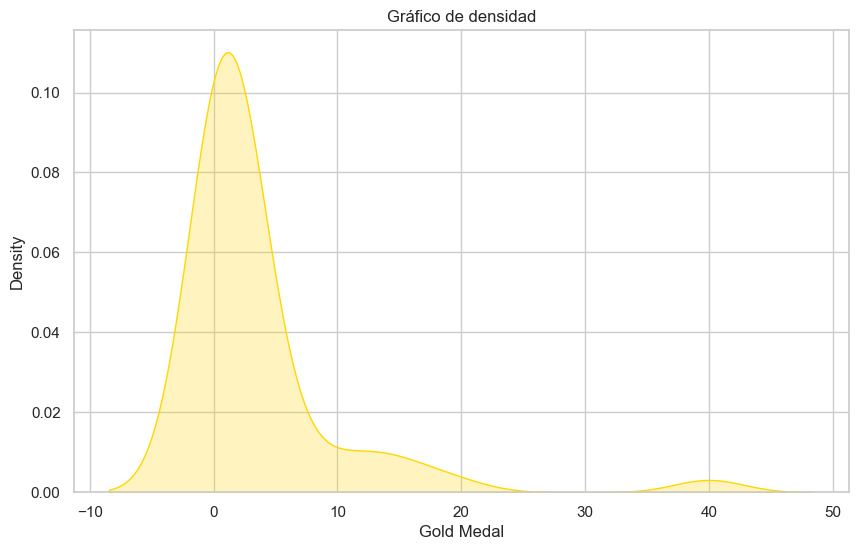

In [45]:
# Grafico de densidad para visualizar de las medallas de oro
plt.figure(figsize=(10,6))
sns.kdeplot(df_medals['Gold Medal'], shade=True, color='gold')
plt.title('Grafico de densidad medallas de oro')
plt.show()


C:\Users\john_\AppData\Local\Temp\ipykernel_4476\3775661341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_medals['Silver Medal'], shade=True, color='silver')


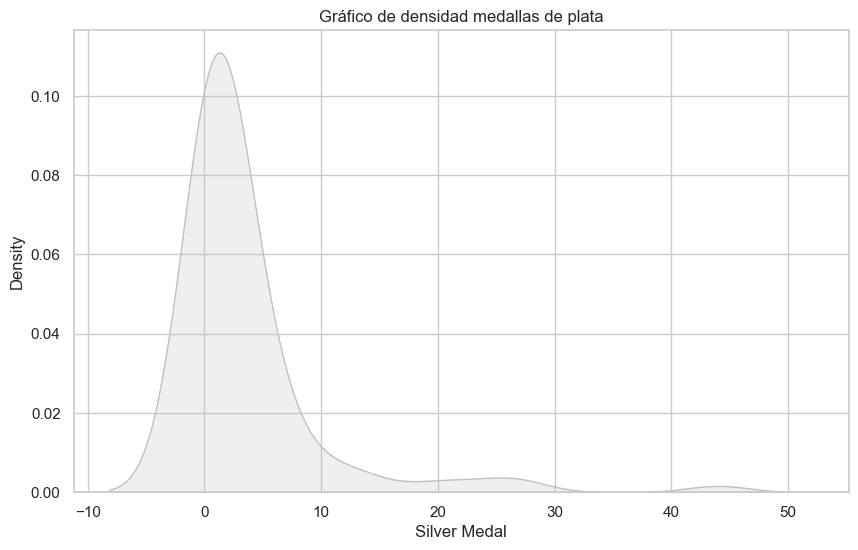

In [46]:
# Grafico de densidad para visualizar de las medallas de plata
plt.figure(figsize=(10,6))
sns.kdeplot(df_medals['Silver Medal'], shade=True, color='silver')
plt.title('Grafico de densidad medallas de plata')
plt.show()

C:\Users\john_\AppData\Local\Temp\ipykernel_4476\1912996494.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_medals['Bronze Medal'], shade=True, color='brown')


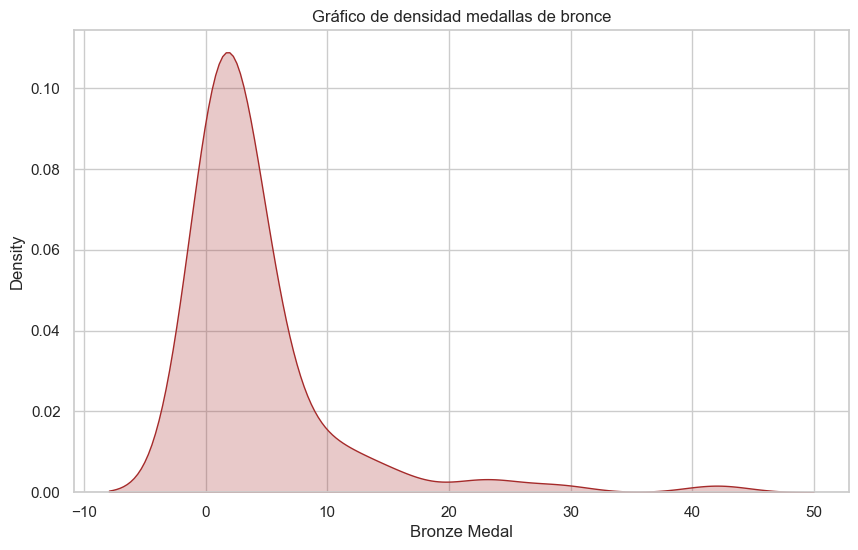

In [48]:
# Grafico de densidad para visualizar de las medallas de bronce
plt.figure(figsize=(10,6))
sns.kdeplot(df_medals['Bronze Medal'], shade=True, color='brown')
plt.title('Grafico de densidad medallas de bronce')
plt.show()

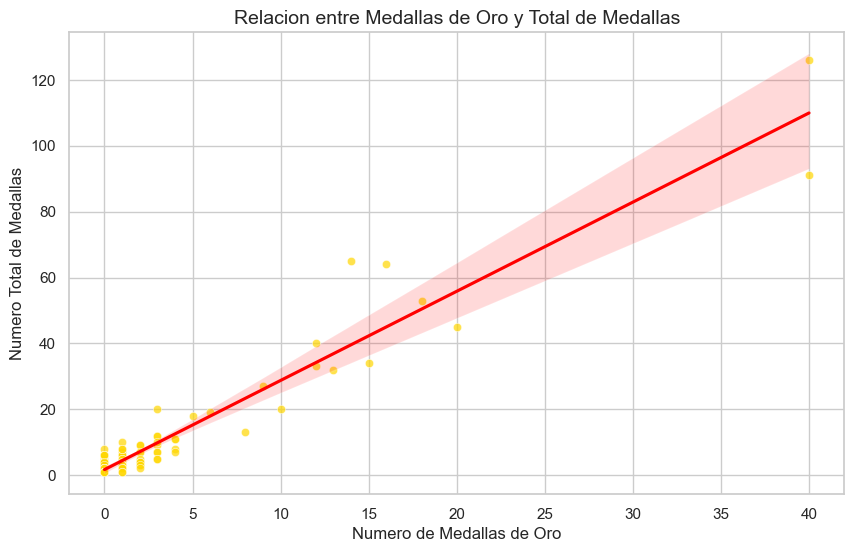

In [55]:
df_medals['Total Medals'] = df_medals['Gold Medal'] + df_medals['Silver Medal'] + df_medals['Bronze Medal']

# Crear grafico de dispersion con linea de regresion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gold Medal', y='Total Medals', data=df_medals, color='gold', alpha=0.7)
sns.regplot(x='Gold Medal', y='Total Medals', data=df_medals, scatter=False, color='red')

plt.title('Relacion entre Medallas de Oro y Total de Medallas', fontsize=14)
plt.xlabel('Numero de Medallas de Oro', fontsize=12)
plt.ylabel('Numero Total de Medallas', fontsize=12)

plt.show()

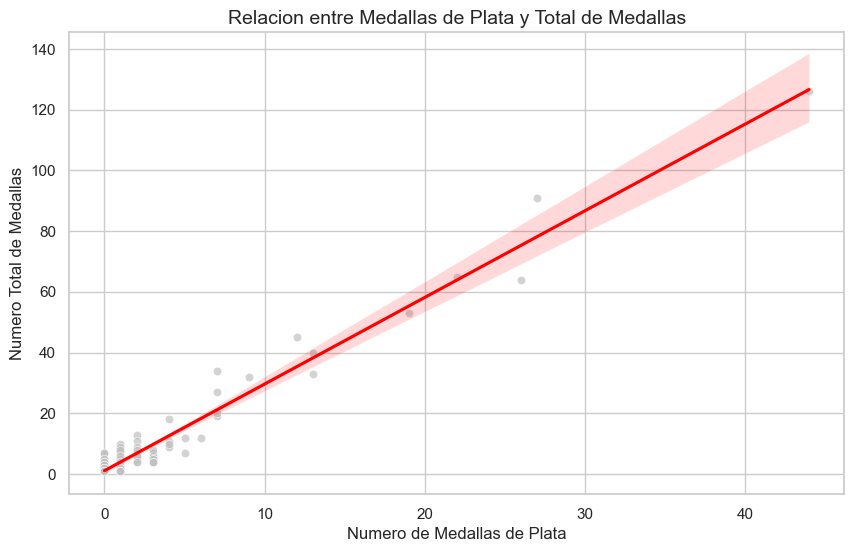

In [56]:
df_medals['Total Medals'] = df_medals['Gold Medal'] + df_medals['Silver Medal'] + df_medals['Bronze Medal']

# Crear grafico de dispersion con linea de regresion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Silver Medal', y='Total Medals', data=df_medals, color='silver', alpha=0.7)
sns.regplot(x='Silver Medal', y='Total Medals', data=df_medals, scatter=False, color='red')

plt.title('Relacion entre Medallas de Plata y Total de Medallas', fontsize=14)
plt.xlabel('Numero de Medallas de Plata', fontsize=12)
plt.ylabel('Numero Total de Medallas', fontsize=12)

plt.show()

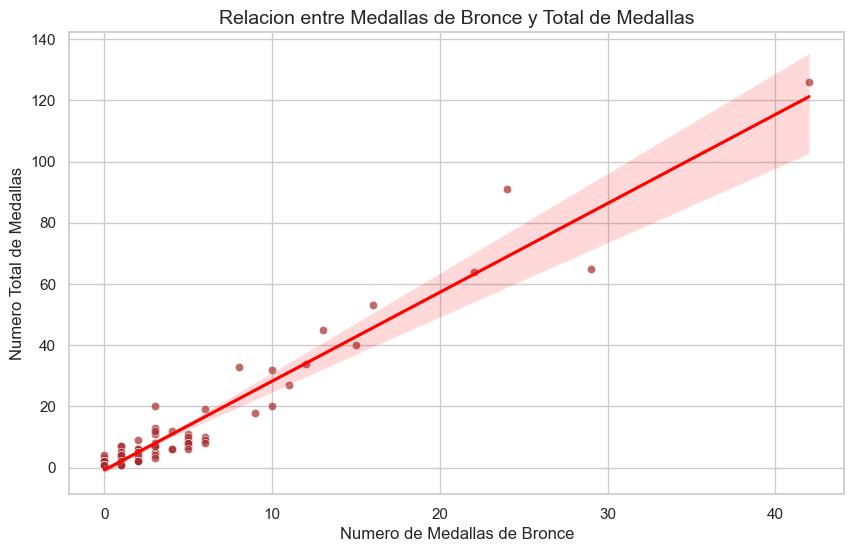

In [57]:
df_medals['Total Medals'] = df_medals['Gold Medal'] + df_medals['Silver Medal'] + df_medals['Bronze Medal']

# Crear grafico de dispersion con linea de regresion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bronze Medal', y='Total Medals', data=df_medals, color='brown', alpha=0.7)
sns.regplot(x='Bronze Medal', y='Total Medals', data=df_medals, scatter=False, color='red')

plt.title('Relacion entre Medallas de Bronce y Total de Medallas', fontsize=14)
plt.xlabel('Numero de Medallas de Bronce', fontsize=12)
plt.ylabel('Numero Total de Medallas', fontsize=12)

plt.show()

## Analisis de los mejores 5 paises

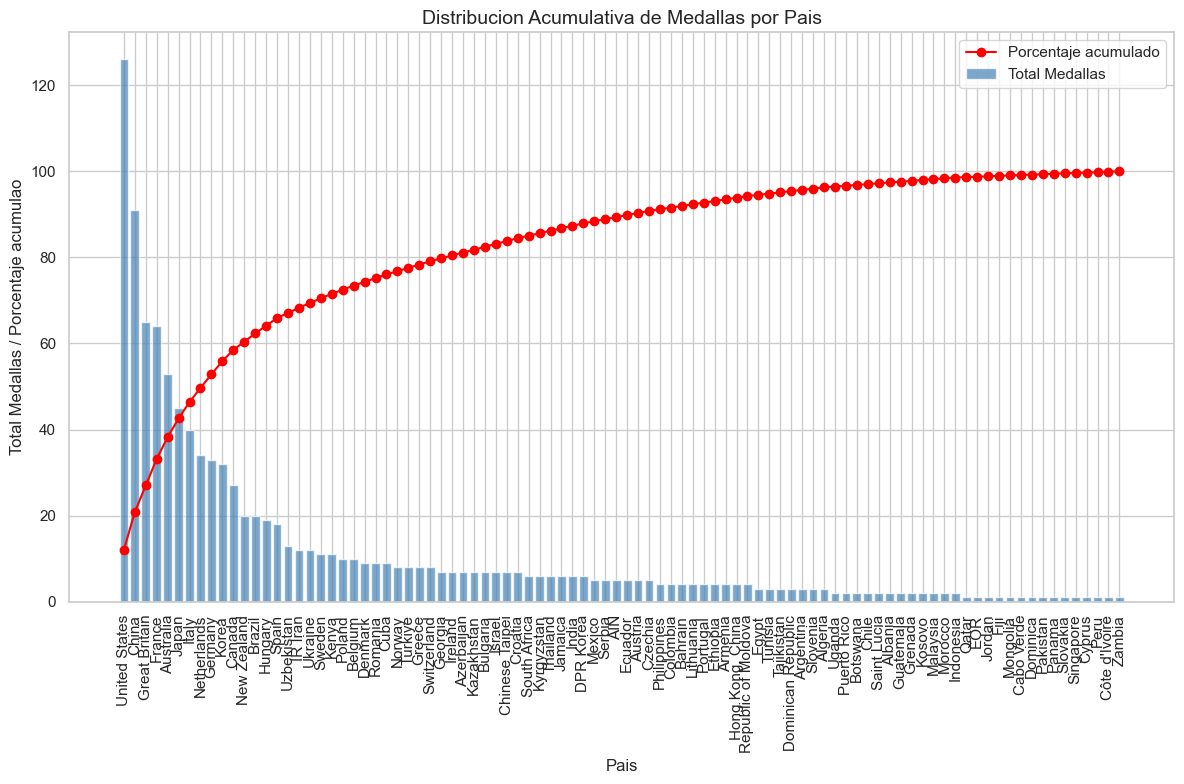

In [63]:
# Agrupar y sumar medallas por pais o equipo
df_totals = df_medals.groupby('country')['Total Medals'].sum().reset_index()

# Ordenar en orden descendente
df_totals = df_totals.sort_values(by='Total Medals', ascending=False)

# Calcular el porcentaje acumulado
df_totals['Cumulative Percentage'] = df_totals['Total Medals'].cumsum() / df_totals['Total Medals'].sum() * 100

# Crear grafico de barras para la distribucion de medallas
plt.figure(figsize=(12, 8))
plt.bar(df_totals['country'], df_totals['Total Medals'], color='steelblue', alpha=0.7, label='Total Medallas')
plt.plot(df_totals['country'], df_totals['Cumulative Percentage'], color='red', marker='o', label='Porcentaje acumulado')

# Configurar el grafico
plt.xticks(rotation=90)
plt.xlabel('Pais')
plt.ylabel('Total Medallas / Porcentaje acumulao')
plt.title('Distribucion Acumulativa de Medallas por Pais', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

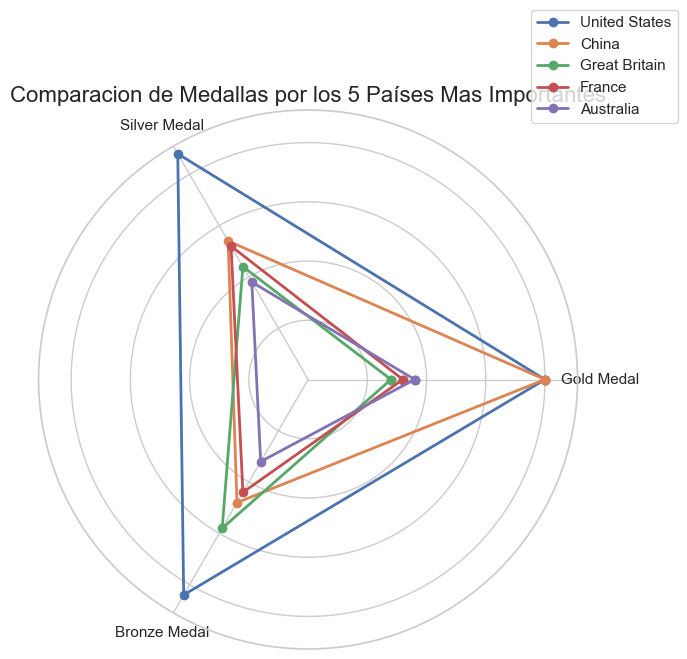

In [69]:
import numpy as np
from math import pi

# Agrupar y sumar medallas por pais
df_medals_summary = df_medals.groupby('country').agg({
    'Gold Medal': 'sum',
    'Silver Medal': 'sum',
    'Bronze Medal': 'sum'
}).reset_index()

# Calcular el total de medallas y seleccionar los 5 países más importantes
df_medals_summary['Total Medals'] = df_medals_summary[['Gold Medal', 'Silver Medal', 'Bronze Medal']].sum(axis=1)
top_5_countries = df_medals_summary.sort_values(by='Total Medals', ascending=False).head(5)

# Número de categorias
categories = ['Gold Medal', 'Silver Medal', 'Bronze Medal']
num_categories = len(categories)

# Crear el grafico de radar
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círcul

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(polar=True))

# Añadir los datos para los 5 países mas importantes
for i, row in top_5_countries.iterrows():
    values = row[categories].tolist()
    values += values[:1]  
    ax.plot(angles, values, label=row['country'], linewidth=2, linestyle='-', marker='o')

# Añadir etiquetas y leyenda
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Comparacion de Medallas por los 5 Países Mas Importantes', fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()

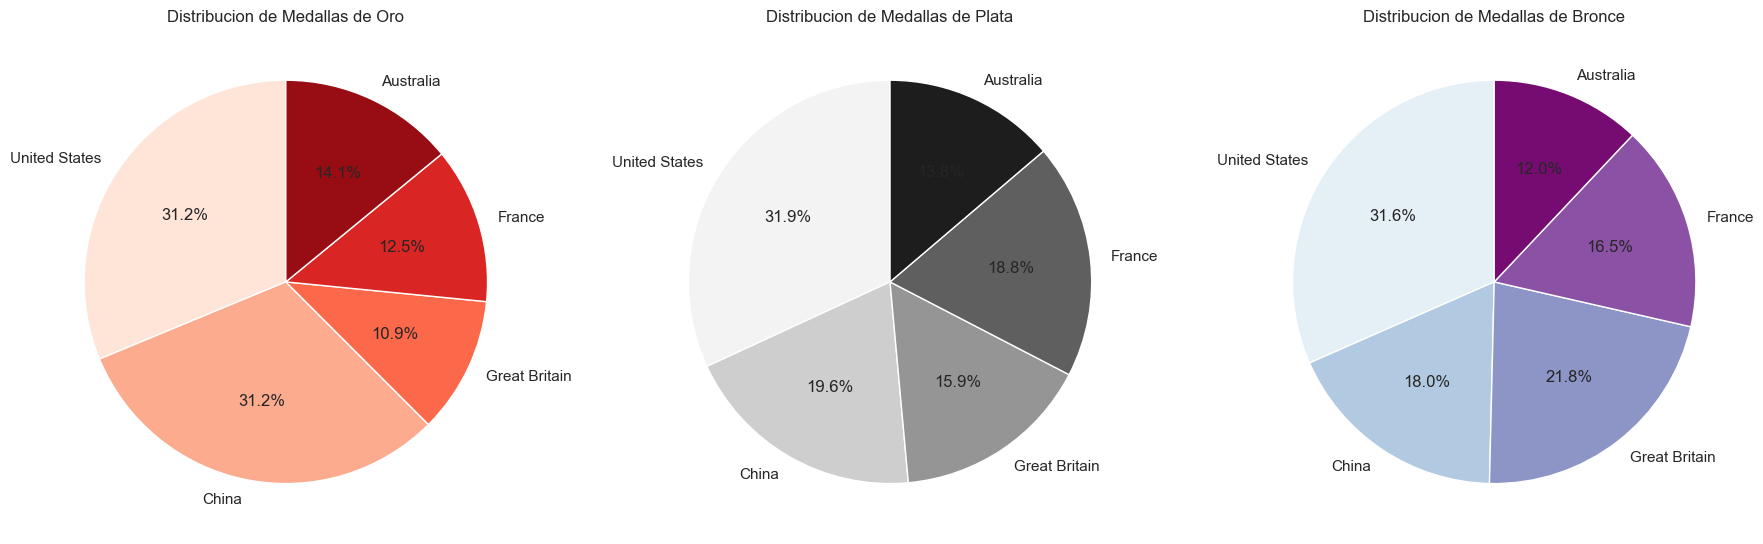

In [72]:
# Agrupar y sumar medallas por pais
df_medals_summary = df_medals.groupby('country').agg({
    'Gold Medal': 'sum',
    'Silver Medal': 'sum',
    'Bronze Medal': 'sum'
}).reset_index()

# Calcular el total de medallas y seleccionar los 5 paises mas importantes
df_medals_summary['Total Medals'] = df_medals_summary[['Gold Medal', 'Silver Medal', 'Bronze Medal']].sum(axis=1)
top_5_countries = df_medals_summary.sort_values(by='Total Medals', ascending=False).head(5)

# Crear graficos de pastel para cada tipo de medalla
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Medallas de oro
axs[0].pie(top_5_countries['Gold Medal'], labels=top_5_countries['country'], autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Reds')(np.linspace(0.1, 0.9, 5)))
axs[0].set_title('Distribucion de Medallas de Oro')

# Medallas de plata
axs[1].pie(top_5_countries['Silver Medal'], labels=top_5_countries['country'], autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('Greys')(np.linspace(0.1, 0.9, 5)))
axs[1].set_title('Distribucion de Medallas de Plata')

# Medallas de bronce
axs[2].pie(top_5_countries['Bronze Medal'], labels=top_5_countries['country'], autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('BuPu')(np.linspace(0.1, 0.9, 5)))
axs[2].set_title('Distribucion de Medallas de Bronce')

plt.tight_layout()
plt.show()


## Conclusiones Finales del Analisis de Datos de Medallas

### 1. Distribucion de Medallas por Paises
- **Top 5 Paises**: Los 5 paises mas importantes en términos de medallas muestran una notable concentración de medallas. Estos paises tienen una cantidad significativamente mayor de medallas en comparacion con otros paises.
- **Proporcion de Medallas**: Los graficos de pastel para cada tipo de medalla (oro, plata, bronce) muestran como se distribuyen estas medallas entre los 5 paises principales. Esto permite observar que paises dominan en cada tipo de medalla.

### 2. Relacion entre Medallas de Oro y Total de Medallas
- **Correlacion**: El diagrama de dispersion con la iinea de regresion revela la relacion entre el numero de medallas de oro y el total de medallas ganadas. Una correlacion positiva sugiere que los paises que ganan mas medallas de oro tienden a ganar mas medallas en general.
- **Tendencias**: Este análisis puede ayudar a entender si los paises con un alto rendimiento en medallas de oro tambien destacan en otros tipos de medallas.

### 3. Distribucion Acumulativa de Medallas
- **Efecto Pareto**: El grafico de distribucion acumulativa muestra que una pequeña cantidad de paises o equipos contribuye a una gran parte del total de medallas. Esto es indicativo del principio de Pareto, donde un pequeño porcentaje de países gana la mayor parte de las medallas.
- **Concentracion**: Identifica que paises son responsables de la mayoria de las medallas y permite evaluar el impacto de estos paises en la competicion global.

### 4. Analisis de Datos de Medallas
- **Visualizacion Detallada**: Los histogramas y graficos de densidad muestran la distribucion de medallas de oro, plata y bronce. Esto ayuda a identificar patrones y posibles outliers en los datos.
- **Comparacion de Categorías**: Los graficos de radar permiten comparar multiples categoriuas de medallas entre los principales paises, proporcionando una vision clara de en que tipo de medallas se destacan.

### 5. Observaciones Adicionales
- **Medallas por Tipo**: La visualizacion de las medallas de oro, plata y bronce a través de graficos de pastel proporciona una representacion clara de como se distribuyen los distintos tipos de medallas entre los principales paises.
- **Impacto en el Desempeño Global**: El analisis puede ofrecer informacion sobre como los paises con alto rendimiento en medallas de oro tambien influyen en su desempeño global.

Este analisis proporciona una vision integral del desempeño en los Juegos Olímpicos, destacando los principales actores y como se distribuyen las medallas entre ellos.
